In [32]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

Problem Statement 
At MainGames we are committed to help streamers increase their revenues by leveraging the rich source of streaming data to provide actionable insights. In this problem, we want to learn whether certain features of streamers will make them more or less likely to receive stars from their audience, in this case PaidStarPerWatchedHour is our dependent variable. 

Dataset Description 
This dataset consists of more than 600 streamers (Indonesia, Vietnam, Philippines). Each row represents data of one unique streamer. There are different sets of facial features extracted using an AI tool (e.g., Self_Esteem_, Character_Facet_, Personal_Values_Facet_, Temperament_), in addition to Gender, Game, Country, Total Follower, and the role they play in the game (e.g., Role_Director). 

Preprocessing

In [33]:
df = pd.read_csv('Maingames_DS_dataset.csv')
df

,Unnamed: 0,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,0,ID,Male,MLBB,96751,104,0.004113,0.663442,0.718679,0.288008,...,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,1,ID,Male,8 Ball Pool,4781,174,0.002855,0.543255,0.427887,0.430609,...,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,2,ID,Female,Free Fire - Battlegrounds,68246,83,0.003007,0.527279,0.399873,0.753009,...,0.581657,0.443453,0.325263,0.398686,0.515929,0.309322,0.070988,0.305975,0.759900,0.000
3,3,ID,Male,MLBB,142037,127,0.005171,0.677222,0.603534,0.407923,...,0.385822,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000
4,4,ID,Male,Free Fire - Battlegrounds,15416,86,0.001213,0.238194,0.543285,0.392993,...,0.582025,0.135650,0.405968,0.439668,0.586193,0.567604,0.324364,0.298716,0.814530,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,942,VN,Male,PUBG,330969,182,0.001082,0.534637,0.399738,0.548851,...,0.568354,0.271178,0.399811,0.423934,0.402793,0.416404,0.171556,0.285894,0.762268,0.125
627,943,VN,Male,MU Online,33450,102,0.000082,0.664025,0.597952,0.578953,...,0.409843,0.668646,0.352585,0.755972,0.539407,0.640965,0.241956,0.303950,0.805624,0.625
628,944,VN,Male,Age of Empires,29000,103,0.000724,0.561336,0.378814,0.547942,...,0.594737,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250
629,945,VN,Female,PUBG,19771,143,0.000433,0.600844,0.364150,0.516497,...,0.473707,0.332203,0.351585,0.603314,0.401816,0.461684,0.229152,0.296722,0.722012,0.125


In [34]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

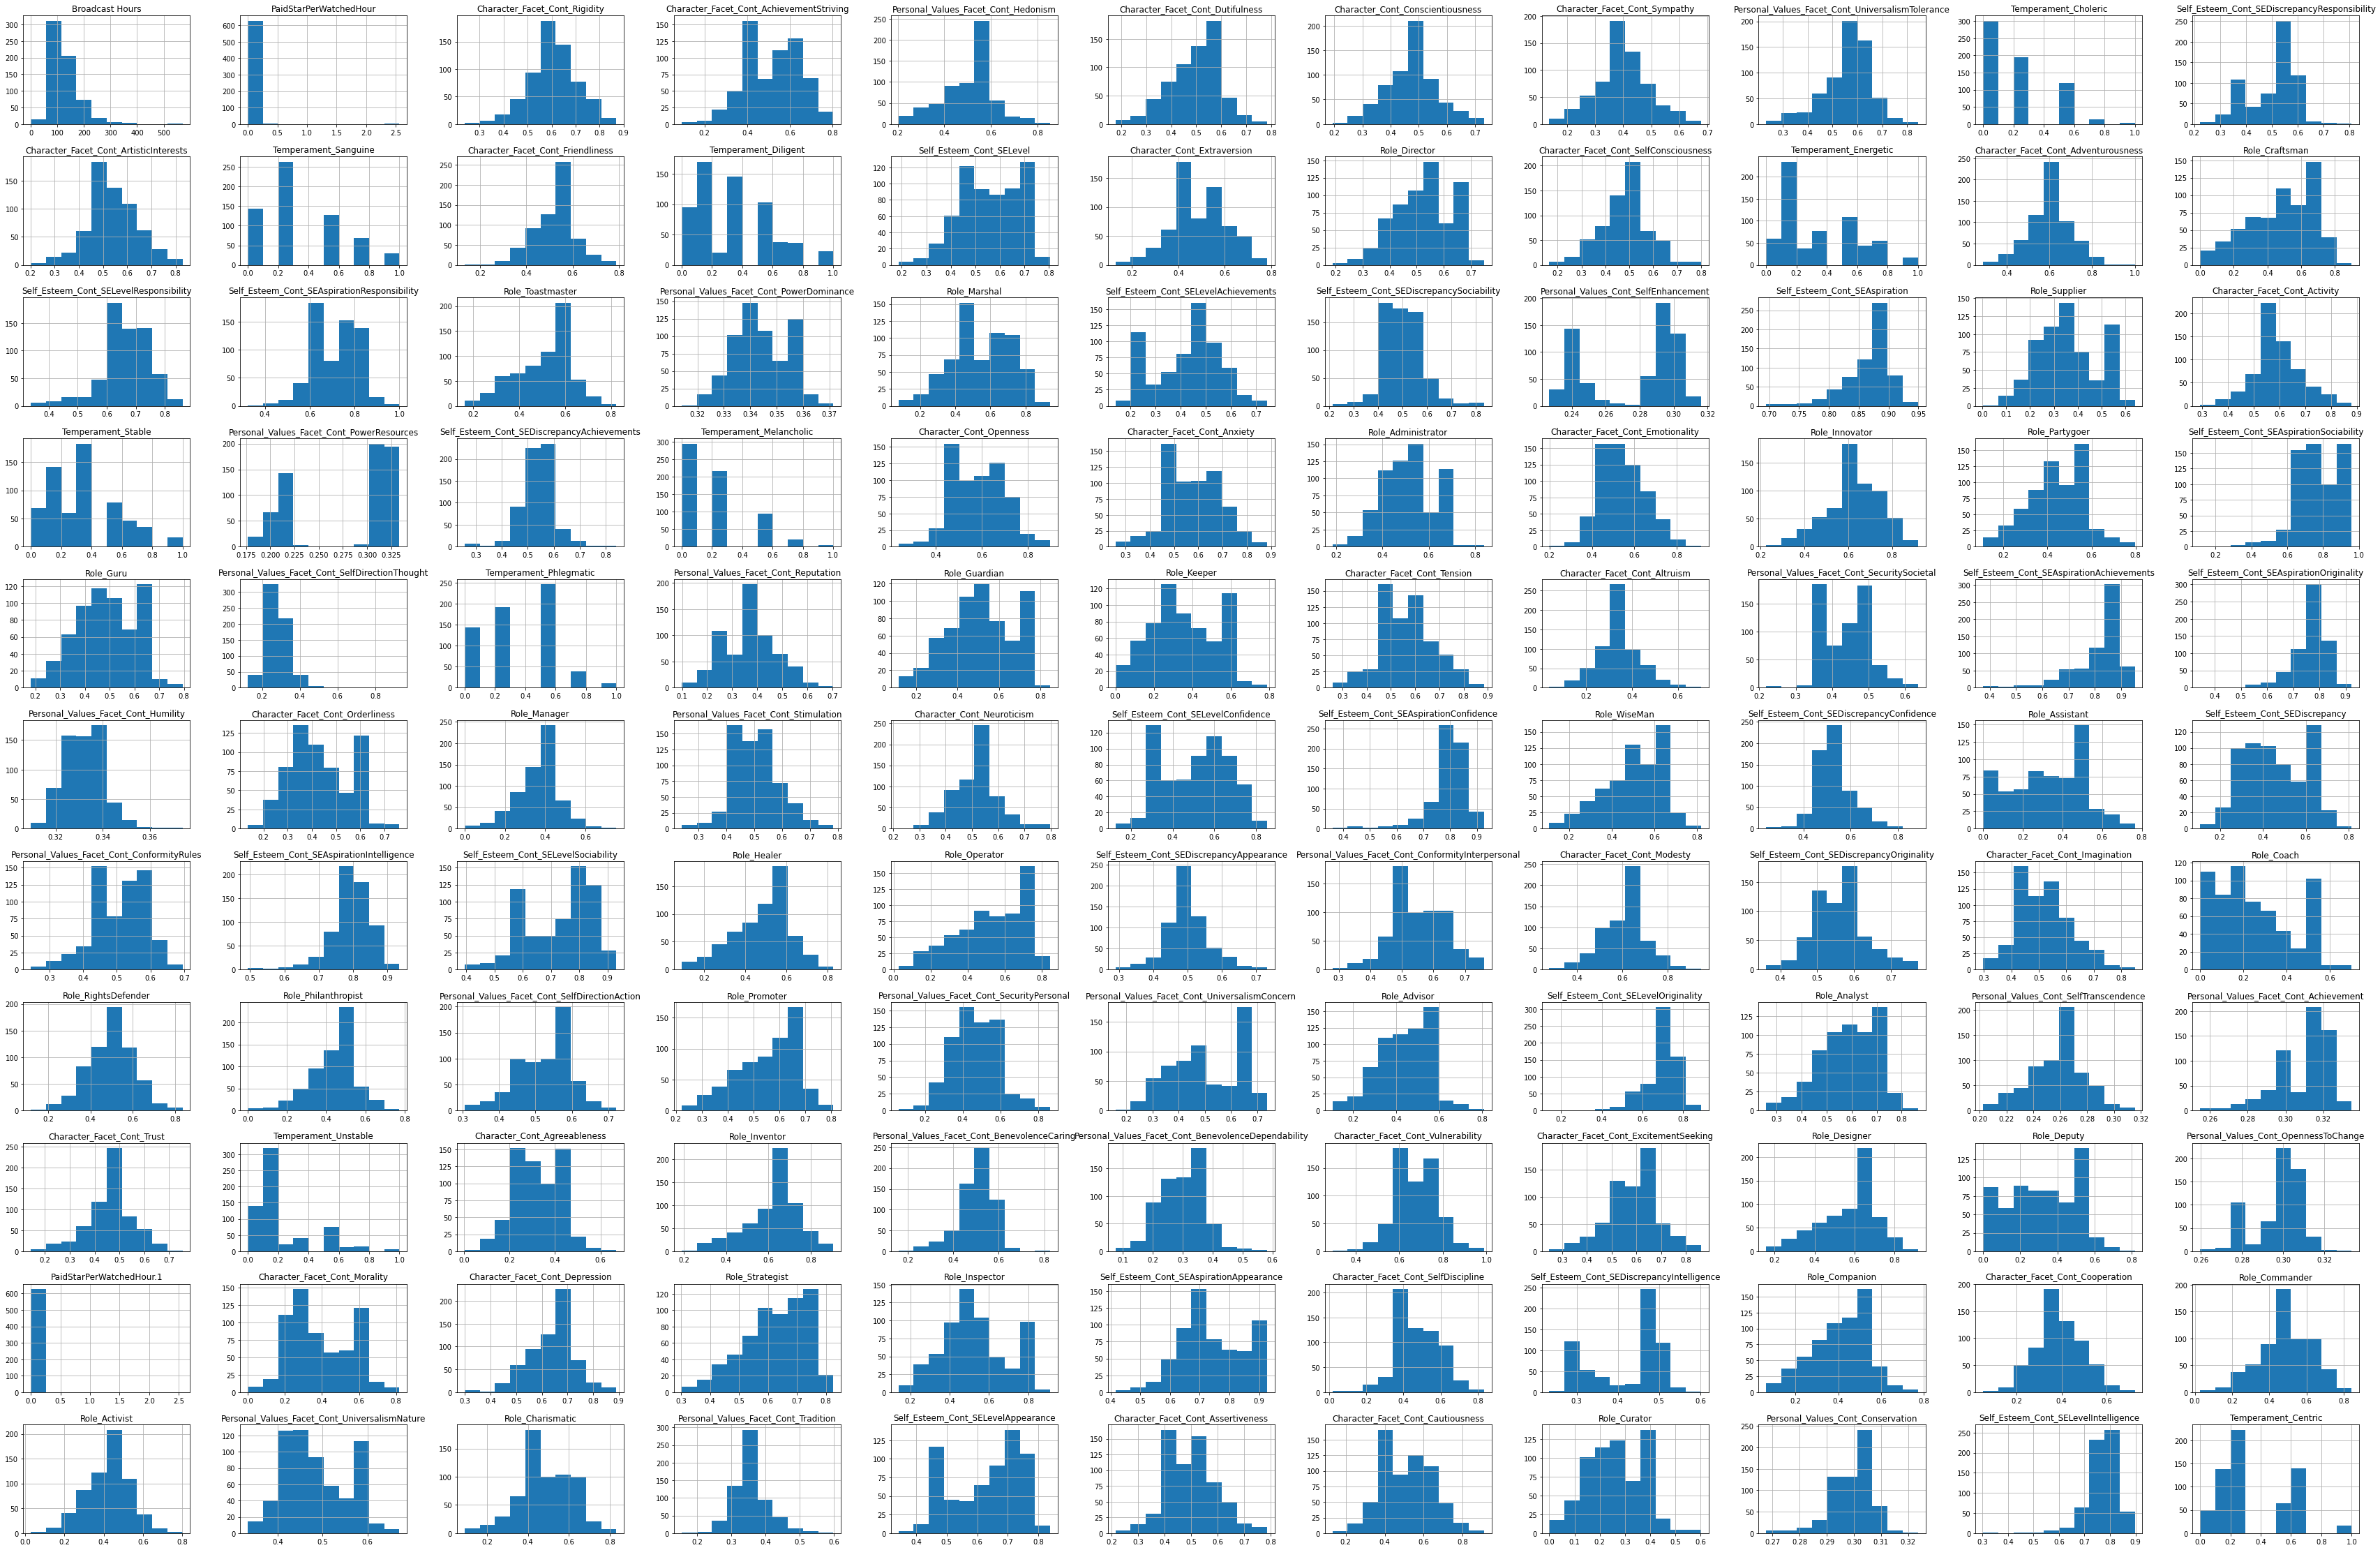

In [35]:
pd.DataFrame(df, columns=df.columns).hist(figsize=(60, 40))
plt.show()

In [36]:
df.dtypes # Melihat informasi mengenai feature pada dataset

Country                                  object
Gender                                   object
Game                                     object
Total Follower                           object
Broadcast Hours                           int64
                                         ...   
Character_Facet_Cont_Cautiousness       float64
Role_Curator                            float64
Personal_Values_Cont_Conservation       float64
Self_Esteem_Cont_SELevelIntelligence    float64
Temperament_Centric                     float64
Length: 126, dtype: object

In [37]:
for i in range(len(df.columns)): # Melihat Nilai Unik pada dataset
  print(df.columns[i])
  print(df[df.columns[i]].unique(), "\n")

Country
['ID' 'PH' 'VN'] 

Gender
['Male' 'Female' '-' nan] 

Game
['MLBB' '8 Ball Pool' 'Free Fire - Battlegrounds' 'PUBG'
 'Call of Duty: Mobile' 'Dead by Daylight' 'Persona 5 Royal'
 'Grand Theft Auto V' 'Euro Truck Simulator 2' 'Days Gone'
 "Assassin's Creed Odyssey" 'Worms Zone' 'Star Wars Jedi: Fallen Order'
 'Naruto Shippuden: Ultimate Ninja Storm 4' 'Apex Legends'
 'Moon of Madness' 'Sea of Thieves' 'EA Sports UFC 3' 'eFootball PES 2020'
 'MotoGP' 'Wormate.io' 'The Warriors' 'God of War' 'Point Blank Indonesia'
 'Valorant' 'Dota 2' 'No MLBB Video' 'Yakuza: Kiwami 2'
 'Counter-Strike: Global Offensive' 'Audition Online' 'Township Mobile'
 'League of Legends' 'Call of Duty: Warzone' 'Crossfire'
 "Five Nights at Freddy's 2" 'RULES OF SURVIVAL' 'NBA 2K20' 'Minecraft'
 'Ragnarok M: Eternal Love' 'Little Big Snake' 'World War Z'
 'CABAL ONLINE' 'Roblox' 'League of Legends: Wild Rift' nan
 'The Last of Us: Part II' 'Age of Empires' 'MU Online' 'FIFA Online 4'
 'Crazy Kart' 'Auto Chess

In [38]:
df.duplicated().sum()# Chek Duplicate value pada dataset

0

In [39]:
print(df.isna().sum())

Country                                 0
Gender                                  1
Game                                    2
Total Follower                          1
Broadcast Hours                         0
                                       ..
Character_Facet_Cont_Cautiousness       0
Role_Curator                            0
Personal_Values_Cont_Conservation       0
Self_Esteem_Cont_SELevelIntelligence    0
Temperament_Centric                     0
Length: 126, dtype: int64


In [40]:
df = df.dropna()

In [41]:
df = df[df["Gender"].str.contains("-") == False]
df = df[df["Game"].str.contains("-") == False]

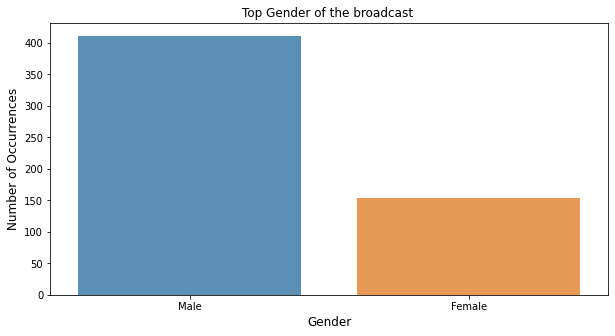

In [42]:
# Plotting a bar graph of the gender of user 
Gender  = df['Gender'].value_counts()
Gender = Gender[:10]
plt.figure(figsize=(10,5))
sns.barplot(x=Gender.index, y=Gender.values, alpha=0.8)
plt.title('Top Gender of the broadcast ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

In [43]:
df['Gender'].value_counts()

Male      411
Female    153
Name: Gender, dtype: int64

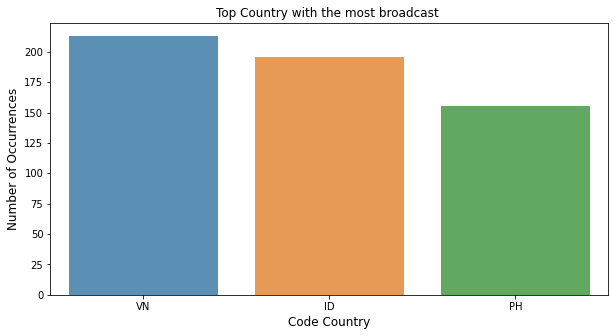

In [44]:
# Plotting a bar graph of the number of Country playing the game
Country  = df['Country'].value_counts()
Country = Country
plt.figure(figsize=(10,5))
sns.barplot(x=Country.index, y=Country.values, alpha=0.8)
plt.title('Top Country with the most broadcast ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Code Country', fontsize=12)
plt.show()

In [45]:
df['Country'].value_counts()

VN    213
ID    196
PH    155
Name: Country, dtype: int64

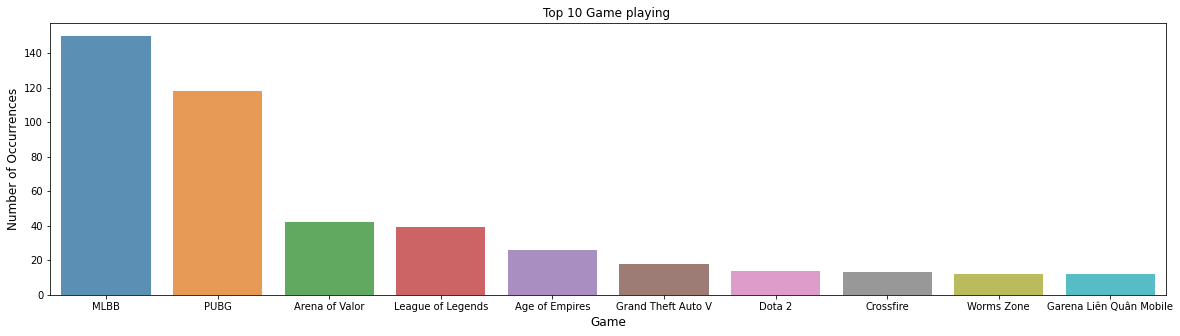

In [46]:
# Plotting a bar graph of the number of Game
Games  = df['Game'].value_counts()
Games = Games[:10]
plt.figure(figsize=(20,5))
sns.barplot(x=Games.index, y=Games.values, alpha=0.8)
plt.title('Top 10 Game playing ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Game', fontsize=12)
plt.show()

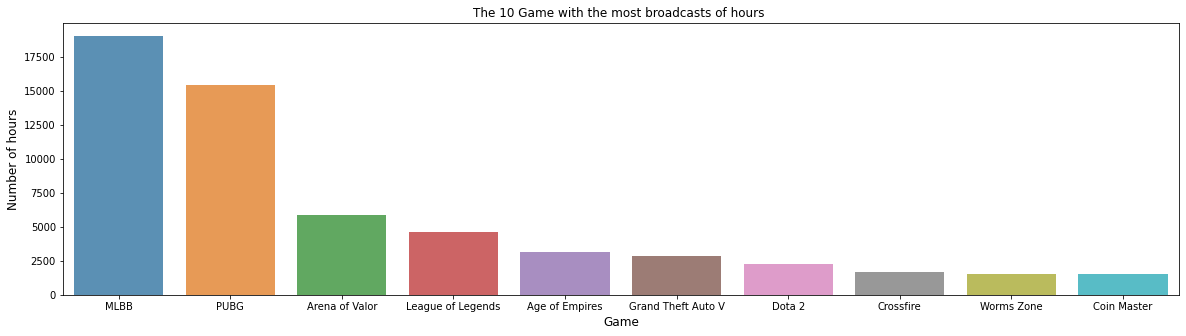

In [47]:
broadcst = df.groupby('Game')['Broadcast Hours'].sum().sort_values(ascending=False)
broadcst= broadcst[:10]
plt.figure(figsize=(20,5))
sns.barplot(x=broadcst.index, y=broadcst.values, alpha=0.8)
plt.title('The 10 Game with the most broadcasts of hours ')
plt.ylabel('Number of hours', fontsize=12)
plt.xlabel('Game', fontsize=12)
plt.show()

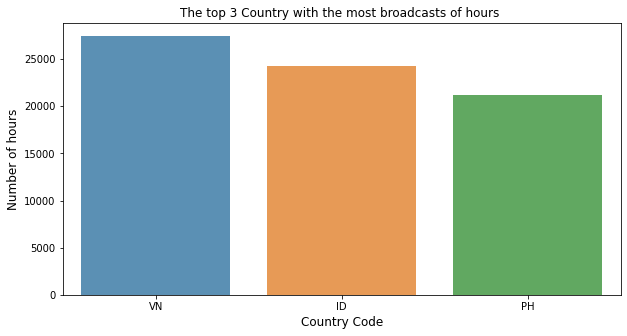

In [48]:
c_broadcst = df.groupby('Country')['Broadcast Hours'].sum().sort_values(ascending=False)
c_broadcst= c_broadcst[:10]
plt.figure(figsize=(10,5))
sns.barplot(x=c_broadcst.index, y=c_broadcst.values, alpha=0.8)
plt.title('The top 3 Country with the most broadcasts of hours ')
plt.ylabel('Number of hours', fontsize=12)
plt.xlabel('Country Code', fontsize=12)
plt.show()

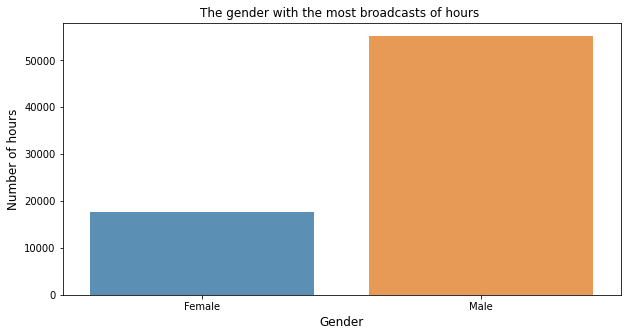

In [49]:
g_broadcst = df.groupby('Gender')['Broadcast Hours'].sum()
g_broadcst= g_broadcst
plt.figure(figsize=(10,5))
sns.barplot(x=g_broadcst.index, y=g_broadcst.values, alpha=0.8)
plt.title('The gender with the most broadcasts of hours ')
plt.ylabel('Number of hours', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

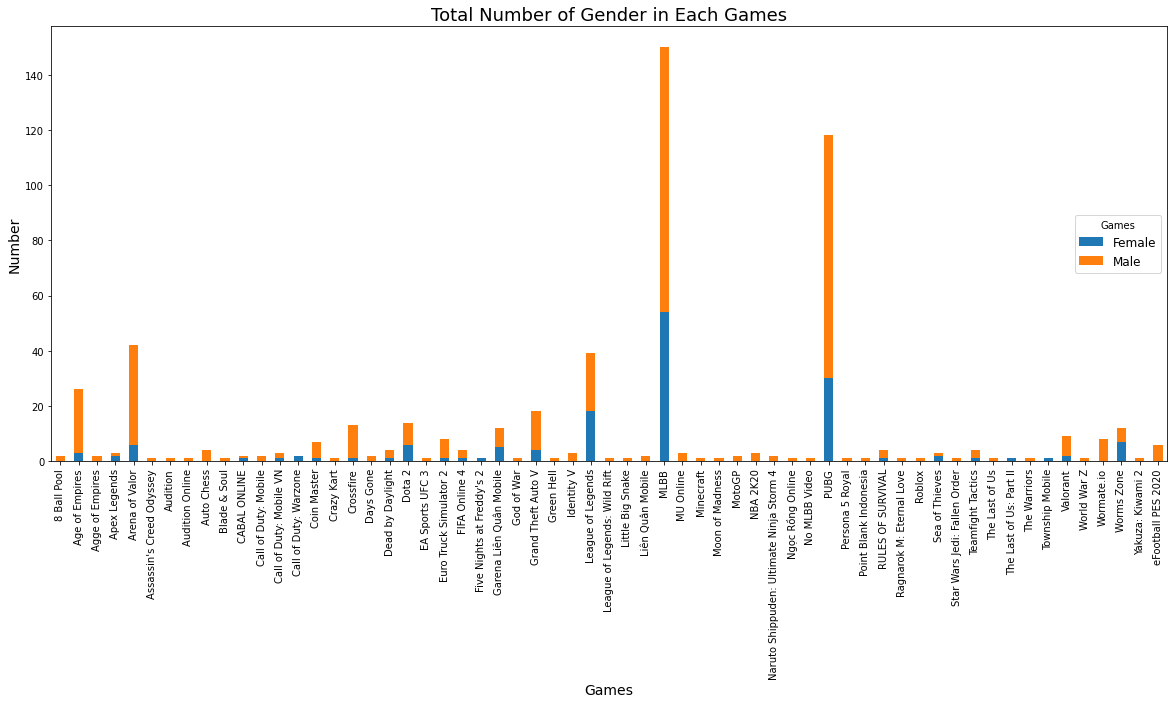

In [50]:
# group data by game and gender, count the number of rows for each group
grouped = df.groupby(['Game', 'Gender']).size().reset_index(name='count')
# pivot the data to create a new dataframe with Game as index and Gender as columns
pivot_df = grouped.pivot(index='Game', columns='Gender', values='count')

# plot the dataframe as a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(20, 8))
# set chart title and labels
plt.title('Total Number of Gender in Each Games', fontsize=18)
plt.xlabel('Games', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.legend(title='Games', loc='center right', fontsize=12)
plt.show()

In [51]:
df['Country'].replace(['ID','PH','VN'] , [0,1,2], inplace = True)

In [52]:
df['Gender'].replace(['Male','Female'] , [0,1], inplace = True)

In [53]:
label_encoder = preprocessing.LabelEncoder()
df.Game = label_encoder.fit_transform(df.Game)

In [54]:
df['Total Follower'].replace(['250,98'] , [250.98], inplace = True)

In [55]:
df['Total Follower'] = pd.to_numeric(df['Total Follower'])
df

,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,0,0,33,96751.0,104,0.004113,0.663442,0.718679,0.288008,0.471456,...,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,0,0,0,4781.0,174,0.002855,0.543255,0.427887,0.430609,0.493514,...,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
3,0,0,33,142037.0,127,0.005171,0.677222,0.603534,0.407923,0.467787,...,0.385822,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000
5,0,0,42,8993.0,136,0.003492,0.680616,0.511026,0.545046,0.539565,...,0.420430,0.549378,0.357217,0.645623,0.579497,0.593127,0.270686,0.302365,0.807262,0.250
6,0,0,0,3477.0,96,0.001151,0.627131,0.698507,0.409713,0.467363,...,0.529037,0.481167,0.452858,0.684452,0.513628,0.705802,0.411288,0.301255,0.819127,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,2,0,42,330969.0,182,0.001082,0.534637,0.399738,0.548851,0.513117,...,0.568354,0.271178,0.399811,0.423934,0.402793,0.416404,0.171556,0.285894,0.762268,0.125
627,2,0,34,33450.0,102,0.000082,0.664025,0.597952,0.578953,0.485526,...,0.409843,0.668646,0.352585,0.755972,0.539407,0.640965,0.241956,0.303950,0.805624,0.625
628,2,0,1,29000.0,103,0.000724,0.561336,0.378814,0.547942,0.567108,...,0.594737,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250
629,2,1,42,19771.0,143,0.000433,0.600844,0.364150,0.516497,0.685349,...,0.473707,0.332203,0.351585,0.603314,0.401816,0.461684,0.229152,0.296722,0.722012,0.125


In [56]:
df['MBTI_grouped'].replace(['INT','IST','ENT','ISF','INF','EST','ESF','ENF'] , [0,1,2,3,4,5,6,7], inplace = True) 

In [57]:
df['Total Follower'] = df['Total Follower'].apply(np.int64)

In [58]:
df.PaidStarPerWatchedHour.isna().sum()

0

0      0
1      0
3      0
5      0
6      0
      ..
626    2
627    2
628    2
629    2
630    2
Name: Country, Length: 564, dtype: int64
0      0
1      0
3      0
5      0
6      0
      ..
626    0
627    0
628    0
629    1
630    0
Name: Gender, Length: 564, dtype: int64
0      33
1       0
3      33
5      42
6       0
       ..
626    42
627    34
628     1
629    42
630    29
Name: Game, Length: 564, dtype: int64
0       96751
1        4781
3      142037
5        8993
6        3477
        ...  
626    330969
627     33450
628     29000
629     19771
630    515000
Name: Total Follower, Length: 564, dtype: int64
0      104
1      174
3      127
5      136
6       96
      ... 
626    182
627    102
628    103
629    143
630    105
Name: Broadcast Hours, Length: 564, dtype: int64
0      0.004113
1      0.002855
3      0.005171
5      0.003492
6      0.001151
         ...   
626    0.001082
627    0.000082
628    0.000724
629    0.000433
630    0.002266
Name: PaidStarPerWatchedH

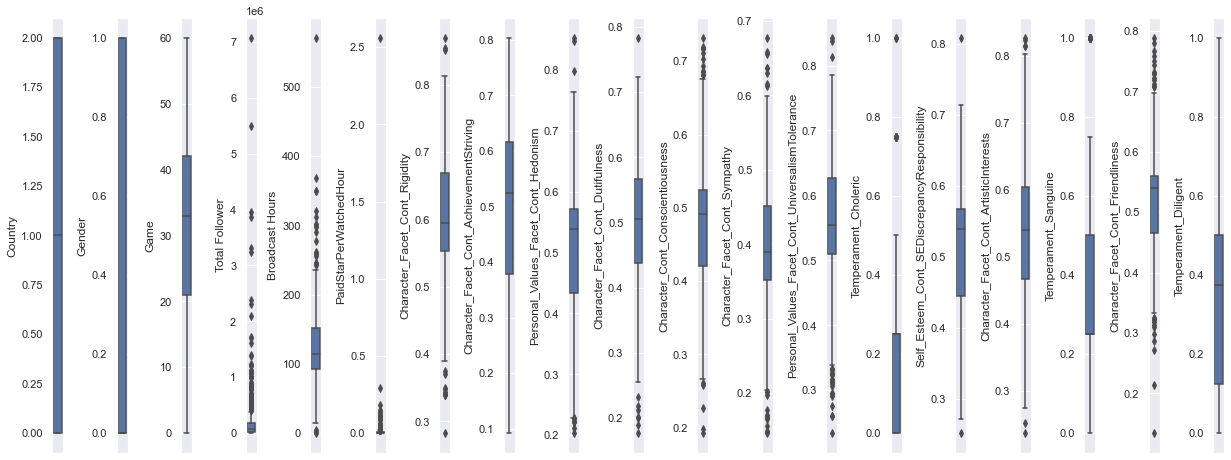

In [59]:
sns.set(rc={'figure.figsize':(21,8)})
f, axes = plt.subplots(1, 19)
column= df.columns
for i in range(19):
  print(df[column[i]])
  sns.boxplot(y = df[column[i]], ax=axes[i])
plt.subplots_adjust(wspace=5)

In [60]:
def interquartile(data,x):
  qua1 = (data[x]).quantile(0.25)
  qua3 = (data[x]).quantile(0.75)
  iqr = qua3 - qua1 
  maximum = qua3+(1.5*iqr)
  minimum = qua1+(1.5*iqr)
  return maximum, minimum

In [61]:
def replace_outliers(data,x,maximum,minimum):
  more = (data[x]>maximum)
  less = (data[x]<minimum)
  print('more: ',more,' less: ',less)
  data[x] = data[x].mask(more, maximum, axis = 0)
  data[x] = data[x].mask(more, maximum, axis = 0)
  return data

In [62]:
var = ['PaidStarPerWatchedHour', 'Total Follower']
len(var)

2

more:  0      False
1      False
3      False
5      False
6      False
       ...  
626    False
627    False
628    False
629    False
630    False
Name: PaidStarPerWatchedHour, Length: 564, dtype: bool  less:  0      True
1      True
3      True
5      True
6      True
       ... 
626    True
627    True
628    True
629    True
630    True
Name: PaidStarPerWatchedHour, Length: 564, dtype: bool
more:  0      False
1      False
3      False
5      False
6      False
       ...  
626    False
627    False
628    False
629    False
630     True
Name: Total Follower, Length: 564, dtype: bool  less:  0       True
1       True
3       True
5       True
6       True
       ...  
626    False
627     True
628     True
629     True
630    False
Name: Total Follower, Length: 564, dtype: bool


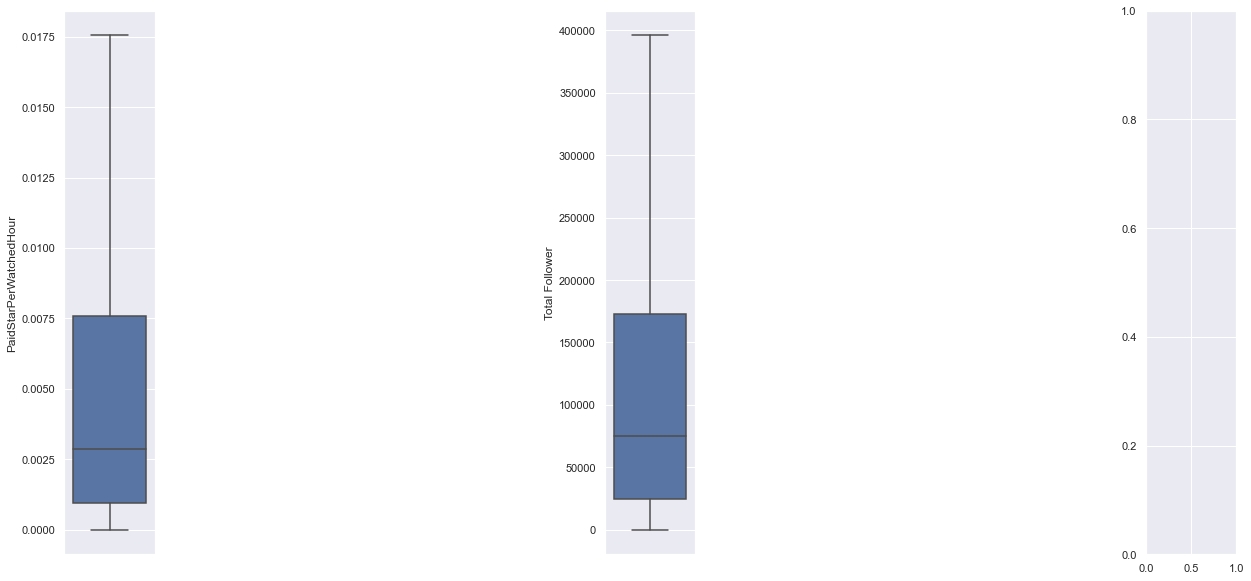

In [63]:
for i in range(len(var)):
  maximum,minimum = interquartile(df,var[i])
  data = replace_outliers (df,var[i],maximum,minimum)

sns.set(rc={'figure.figsize':(21,10)})
f,axes = plt.subplots(1,3)

for i in range(len(var)):
  sns.boxplot(y= data[var[i]], ax= axes[i])
plt.subplots_adjust(wspace=5)

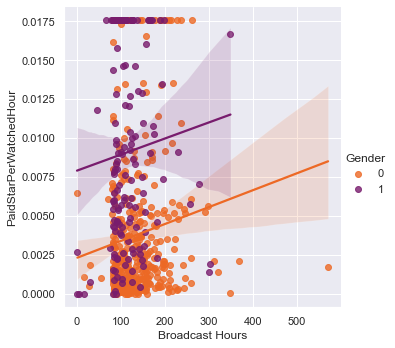

In [64]:
sns.lmplot(x="Broadcast Hours", y="PaidStarPerWatchedHour", hue="Gender", data=df, palette = 'inferno_r')

In [65]:
def corr_for_target(df, target, title=None):
    plt.figure(figsize=(5,20))
    sns.set(font_scale=1)
    
    sns.heatmap(df.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

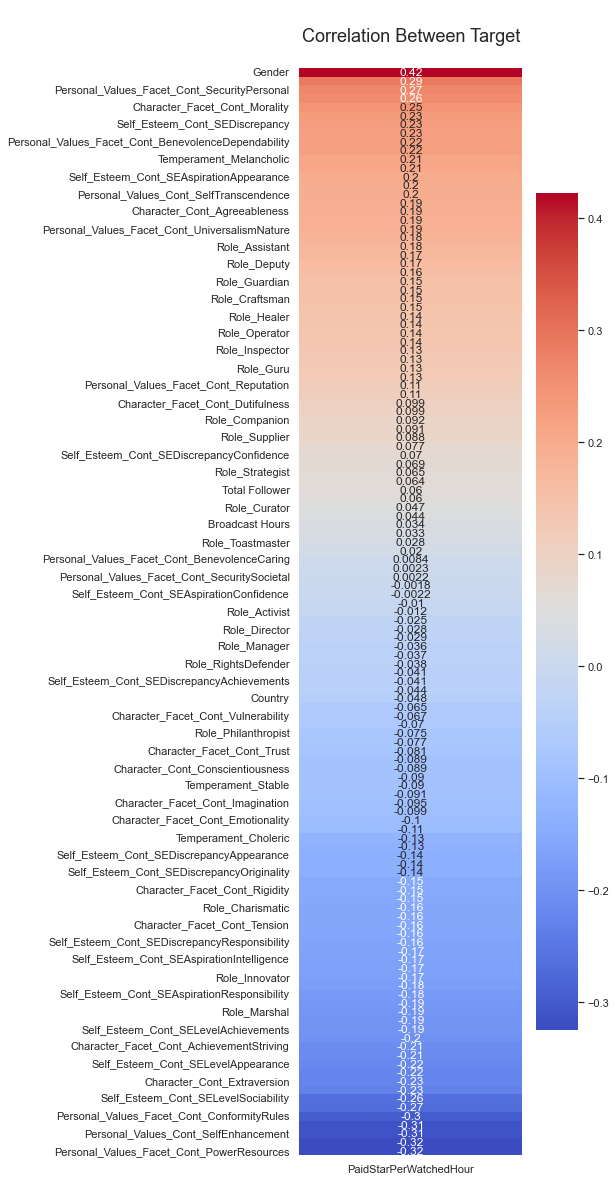

In [66]:
corr_for_target(df, 'PaidStarPerWatchedHour', 'Correlation Between Target')

Check Corelation any Feature with PaidStarPerWatcherHour

In [67]:
target = df.PaidStarPerWatchedHour
df = df.drop(['PaidStarPerWatchedHour'], axis=1)

Feature Selection

In [68]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(df)

VarianceThreshold(threshold=0.01)

In [69]:
selector.get_support()
selector.get_feature_names_out()

array(['Country', 'Gender', 'Game', 'Total Follower', 'Broadcast Hours',
       'Character_Facet_Cont_AchievementStriving',
       'Personal_Values_Facet_Cont_Hedonism', 'Temperament_Choleric',
       'Character_Facet_Cont_ArtisticInterests', 'Temperament_Sanguine',
       'Temperament_Diligent', 'Self_Esteem_Cont_SELevel',
       'Character_Cont_Extraversion', 'Role_Director',
       'Character_Facet_Cont_SelfConsciousness', 'Temperament_Energetic',
       'Role_Craftsman', 'Role_Toastmaster', 'Role_Marshal',
       'Self_Esteem_Cont_SELevelAchievements', 'Role_Supplier',
       'Temperament_Stable', 'Temperament_Melancholic',
       'Character_Cont_Openness', 'Character_Facet_Cont_Anxiety',
       'Role_Administrator', 'Character_Facet_Cont_Emotionality',
       'Role_Innovator', 'Role_Partygoer',
       'Self_Esteem_Cont_SEAspirationSociability', 'Role_Guru',
       'Temperament_Phlegmatic', 'Personal_Values_Facet_Cont_Reputation',
       'Role_Guardian', 'Role_Keeper', 'Character_F

In [70]:
constant_columns = [column for column in df.columns if column not in df.columns[selector.get_support()]]
print(len(constant_columns))

51


In [71]:
constant_columns

['Character_Facet_Cont_Rigidity',
 'Character_Facet_Cont_Dutifulness',
 'Character_Cont_Conscientiousness',
 'Character_Facet_Cont_Sympathy',
 'Personal_Values_Facet_Cont_UniversalismTolerance',
 'Self_Esteem_Cont_SEDiscrepancyResponsibility',
 'Character_Facet_Cont_Friendliness',
 'Character_Facet_Cont_Adventurousness',
 'Self_Esteem_Cont_SELevelResponsibility',
 'Self_Esteem_Cont_SEAspirationResponsibility',
 'Personal_Values_Facet_Cont_PowerDominance',
 'Self_Esteem_Cont_SEDiscrepancySociability',
 'Personal_Values_Cont_SelfEnhancement',
 'Self_Esteem_Cont_SEAspiration',
 'Character_Facet_Cont_Activity',
 'Personal_Values_Facet_Cont_PowerResources',
 'Self_Esteem_Cont_SEDiscrepancyAchievements',
 'Personal_Values_Facet_Cont_SelfDirectionThought',
 'Character_Facet_Cont_Altruism',
 'Personal_Values_Facet_Cont_SecuritySocietal',
 'Self_Esteem_Cont_SEAspirationAchievements',
 'Self_Esteem_Cont_SEAspirationOriginality',
 'Personal_Values_Facet_Cont_Humility',
 'Personal_Values_Facet_Con

In [72]:
df=df.drop(constant_columns, axis=1)
df.head()

,Country,Gender,Game,Total Follower,Broadcast Hours,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Temperament_Choleric,Character_Facet_Cont_ArtisticInterests,Temperament_Sanguine,...,Character_Facet_Cont_SelfDiscipline,Role_Companion,Character_Facet_Cont_Cooperation,Role_Commander,Role_Activist,Role_Charismatic,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Cautiousness,Role_Curator,Temperament_Centric
0,0,0,33,96751.0,104,0.718679,0.288008,0.00,0.504059,0.25,...,0.518061,0.541372,0.352032,0.449807,0.514417,0.408444,0.684412,0.751974,0.524306,0.625
1,0,0,0,4781.0,174,0.427887,0.430609,0.00,0.577758,0.50,...,0.442303,0.230455,0.401419,0.277163,0.286003,0.407624,0.635493,0.571198,0.100202,0.125
3,0,0,33,142037.0,127,0.603534,0.407923,0.50,0.597648,1.00,...,0.535313,0.218070,0.461569,0.419304,0.290019,0.408994,0.703669,0.535322,0.214652,0.000
5,0,0,42,8993.0,136,0.511026,0.545046,0.25,0.614387,0.50,...,0.633364,0.354114,0.443913,0.556028,0.428948,0.549378,0.645623,0.593127,0.270686,0.250
6,0,0,0,3477.0,96,0.698507,0.409713,0.25,0.524768,0.75,...,0.558602,0.432685,0.527564,0.519846,0.454108,0.481167,0.684452,0.705802,0.411288,0.125


Split Data

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3)

Scaling Data

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [77]:
x_train_scaled = pd.DataFrame(x_train, columns=X_train.columns)
x_test_scaled = pd.DataFrame(x_test, columns=X_test.columns)

In [78]:
pd.DataFrame(x_train_scaled, columns=x_train_scaled.columns).hist(figsize=(25, 40))
plt.show()

KeyboardInterrupt: 

Modelling

feature has already normalized

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
models = []
models.append(('Random Forest Clas.', RandomForestRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('Decision Tree Clas.', DecisionTreeRegressor()))
models.append(('GBC',GradientBoostingRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('SVC rbf', SVR(kernel='rbf')))

In [ ]:
model_names = []
scores = []

for name, model in models:
    score = cross_val_score(model, x_train_scaled, y_train, cv = 10, scoring='r2')
    scores.append(score)
    model_names.append(name)
    print(f"Mean of the {name} model scores : {score.mean()}")

Mean of the Random Forest Clas. model scores : 0.9993525656112665
Mean of the KNN model scores : 0.046330007414655136
Mean of the Decision Tree Clas. model scores : 0.9985964509549792
Mean of the GBC model scores : 0.9998108971673627
Mean of the XGB model scores : 0.9948351621921558
Mean of the SVC rbf model scores : -0.5384543285922325


DECISION TREE REGRESSION MODEL

Model Performance Non-Hyperparameter Tuning

In [ ]:
rgg1 = DecisionTreeRegressor()

In [ ]:
best_result = rgg1.fit(x_train_scaled, y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# model evaluation for training set
y_test_predict1 = best_result.predict(x_test_scaled)
r2 = r2_score(y_test, y_test_predict1)
MAE= mean_absolute_error(y_test, y_test_predict1)
mse = mean_squared_error(y_test, y_test_predict1)

print("The model performance for test set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('mse is ', mse)
print("\n")

The model performance for test set
--------------------------------------
R2 is 0.9988791913332223
MAE score is 8.979021076772019e-05
mse is  3.6812146616622674e-08





Before hyperparameter tuning the model performance for test set looks quite good, with a high R2 score indicating that the model can explain a large proportion of the variance in the data. The MSE and RMSE are also quite low, indicating that the model's predictions are close to the actual values. However, the MAE score seems to be relatively high, suggesting that there may be some outliers in the data that are affecting the model's performance. Overall, the model seems to be performing well but may benefit from further tuning or data cleaning to improve its accuracy.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
# model evaluation for training set
y_train_predict1 = best_result.predict(x_train_scaled)
r2 = r2_score(y_train, y_train_predict1)
MAE= mean_absolute_error(y_train, y_train_predict1)
mse = mean_squared_error(y_train, y_train_predict1)

print("The model performance for train set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('MSE score is {}'.format(mse))
print("\n")

The model performance for train set
--------------------------------------
R2 is 1.0
MAE score is 1.5145809028833036e-18
MSE score is 2.1019032387982522e-35




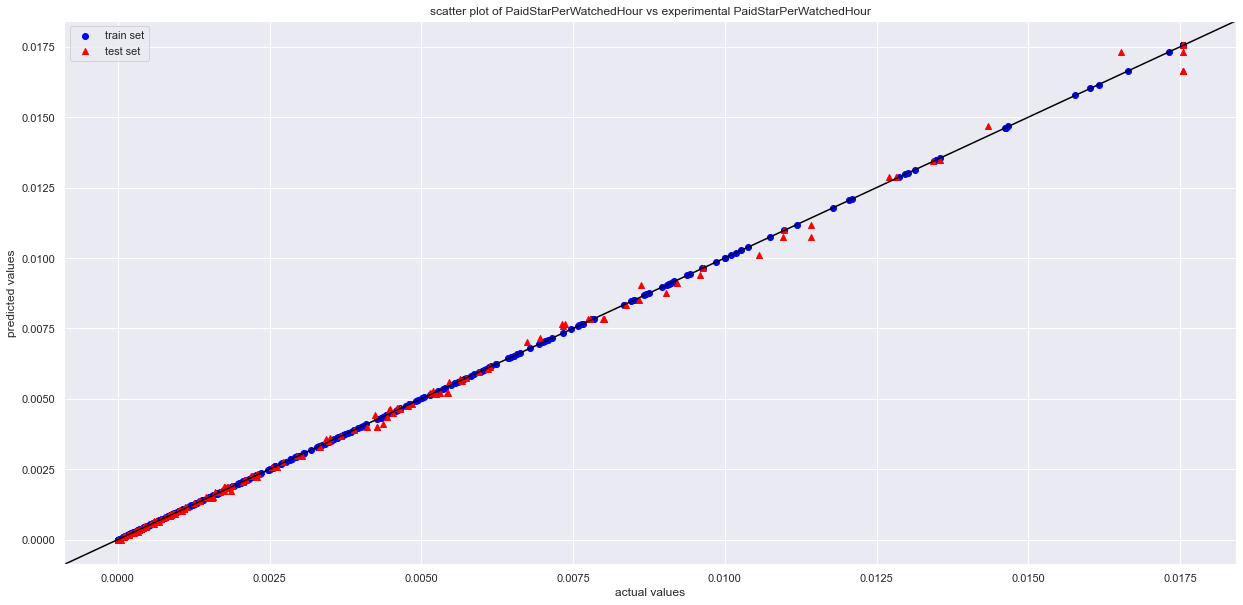

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_train, y_train_predict1, marker='o', c ='blue', label='train set')
ax.scatter(y_test, y_test_predict1, marker='^', c='red', label='test set')
ax.plot([0,1],[0,1], transform=ax.transAxes, color ='black')
ax.legend()
plt.title('scatter plot of PaidStarPerWatchedHour vs experimental PaidStarPerWatchedHour')
plt.ylabel('predicted values')
plt.xlabel('actual values')
plt.show()

Model Performance Using Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [80, 90, 100, None],
    'max_features': ["sqrt", "log2", None],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 3, 4],
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter': ["best", "random"]
}
rf = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, verbose =1, scoring='r2',  n_jobs = -1)
grid_search.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [80, 90, 100, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=1)

In [ ]:
grid_search.best_params_

{'criterion': 'poisson',
 'max_depth': 90,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'best'}

In [ ]:
grid_search.best_score_

0.9991514982720305

In [ ]:
best_result = grid_search.best_estimator_.fit(x_train_scaled, y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# model evaluation for training set
y_test_predict1 = best_result.predict(x_test_scaled)
r2 = r2_score(y_test, y_test_predict1)
mse = mean_squared_error(y_test, y_test_predict1)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict1))
MAPE = np.mean(np.abs((y_test - y_test_predict1) / y_test)) * 100

print("The model performance for test set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('mse is ', mse)
print('RMSE:', rmse)
#print('MAPE', MAPE)

print("\n")

The model performance for test set
--------------------------------------
R2 is 0.9996656993842404
MAE score is 1.5145809028833036e-18
mse is  1.0979860921979792e-08
RMSE: 0.00010478483154531381




After Hyperparameter Tuning the model performance for the test set seems to be excellent based on the provided metrics.

An R2 score of 0.9996 indicates that the model can explain 99.96% of the variance in the target variable. The closer the R2 score to 1, the better the model fits the data.

The mean absolute error (MAE) score is very low at 1.5850265262732247e-18, which means that the average difference between the predicted and actual values is very small.

The mean squared error (MSE) is also very low at 1.0976238746629761e-08, indicating that the model's predictions are very close to the actual values.

Finally, the root mean squared error (RMSE) is also very low at 0.00010476754624705954, which is an indicator of how well the model fits the data.

Overall, based on the provided metrics, the model performance for the test set appears to be very good.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
# model evaluation for training set
y_train_predict1 = best_result.predict(x_train_scaled)
r2 = r2_score(y_train, y_train_predict1)
MAE= mean_absolute_error(y_train, y_train_predict1)
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict1))
MAPE = np.mean(np.abs((y_train - y_train_predict1) / y_train)) * 100

print("The model performance for train set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('RMSE:', rmse)
#print('MAPE', MAPE)
print("\n")

The model performance for train set
--------------------------------------
R2 is 0.9999195423112079
MAE score is 2.3786056590238994e-05
RMSE: 4.989765460374938e-05




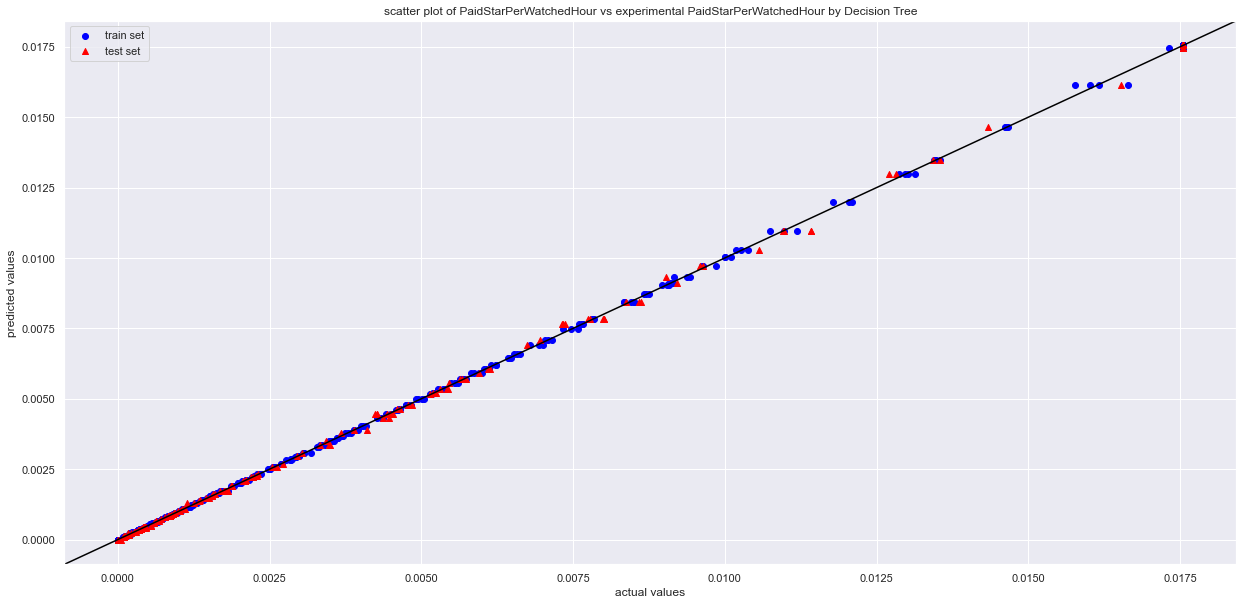

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_train, y_train_predict1, marker='o', c ='blue', label='train set')
ax.scatter(y_test, y_test_predict1, marker='^', c='red', label='test set')
ax.plot([0,1],[0,1], transform=ax.transAxes, color ='black')
ax.legend()
plt.title('scatter plot of PaidStarPerWatchedHour vs experimental PaidStarPerWatchedHour by Decision Tree')
plt.ylabel('predicted values')
plt.xlabel('actual values')
plt.show()

Random Forest Model

Before Hyperparameter Tuning

In [ ]:
rgg2 = RandomForestRegressor()
best_result2 = rgg2.fit(x_train_scaled, y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# model evaluation for training set
y_test_predict2 = best_result2.predict(x_test_scaled)
r2 = r2_score(y_test, y_test_predict2)
MAE= mean_absolute_error(y_test, y_test_predict2)
mse = mean_squared_error(y_test, y_test_predict2)

print("The model performance for test set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('mse is ', mse)
print("\n")

The model performance for test set
--------------------------------------
R2 is 0.99974642675424
MAE score is 4.545470006027386e-05
mse is  8.328429086658604e-09




In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
# model evaluation for training set
y_train_predict2 = best_result.predict(x_train_scaled)
r2 = r2_score(y_train, y_train_predict2)
MAE= mean_absolute_error(y_train, y_train_predict2)
mse = mean_squared_error(y_train, y_train_predict2)

print("The model performance for train set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('MSE score is {}'.format(mse))
print("\n")

The model performance for train set
--------------------------------------
R2 is 0.9999195423112079
MAE score is 2.3786056590238994e-05
MSE score is 2.489775934955072e-09




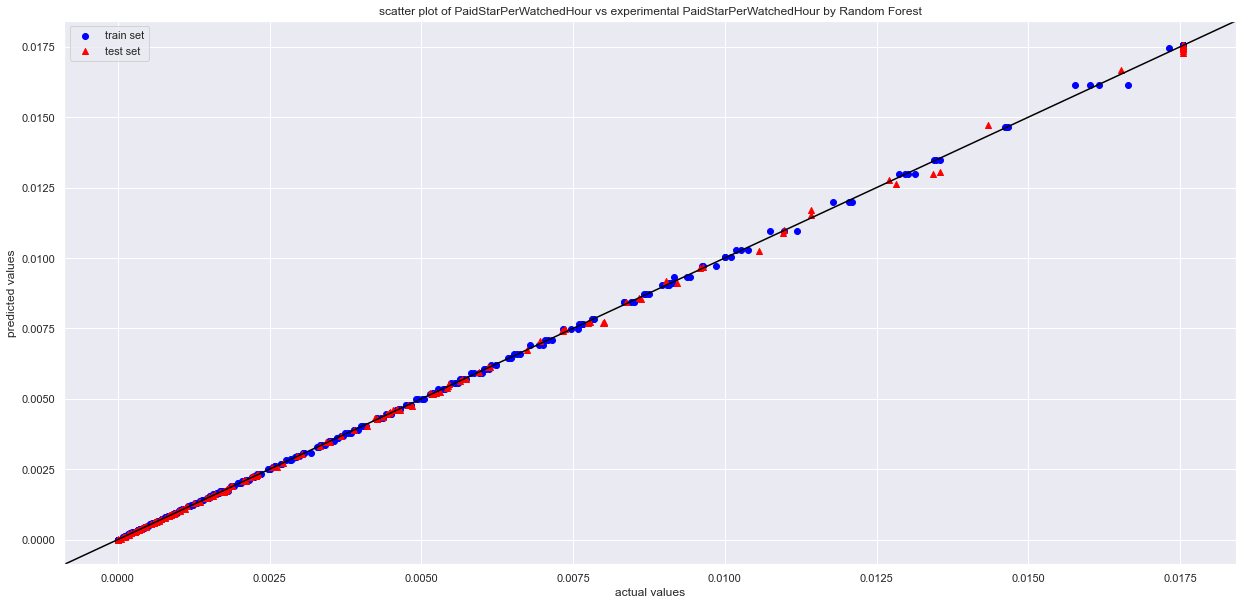

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_train, y_train_predict2, marker='o', c ='blue', label='train set')
ax.scatter(y_test, y_test_predict2, marker='^', c='red', label='test set')
ax.plot([0,1],[0,1], transform=ax.transAxes, color ='black')
ax.legend()
plt.title('scatter plot of PaidStarPerWatchedHour vs experimental PaidStarPerWatchedHour by Random Forest')
plt.ylabel('predicted values')
plt.xlabel('actual values')
plt.show()

After Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_ = {
   'n_estimators': [200, 400,600,800,1000,1200,1400,1600,1800,2000],
   'bootstrap': [True, False],
   'max_depth': [10,20,30,40,50,60,70,80,90,100,110,None],
   'min_samples_split': [2,5,10],
   'min_samples_leaf': [1, 2, 4],
   'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"]

}
grid_search2 = RandomizedSearchCV(rgg2, param_grid_, cv = 10, verbose =1, scoring='r2')
grid_search2.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='r2', verbose=1)

In [ ]:
print(grid_search2.best_score_)
print(grid_search2.best_params_)

0.9996505149836773
{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 40, 'criterion': 'absolute_error', 'bootstrap': True}


In [ ]:
best_result2 = grid_search2.best_estimator_.fit(x_train_scaled, y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# model evaluation for training set
y_test_predict2 = best_result2.predict(x_test_scaled)
r2 = r2_score(y_test, y_test_predict2)
MAE= mean_absolute_error(y_test, y_test_predict2)
mse = mean_squared_error(y_test, y_test_predict2)
MAPE = np.mean(np.abs((y_train - y_train_predict1) / y_train)) * 100

print("The model performance for test set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('mse is ', mse)
#print('MAPE', MAPE)
print("\n")

The model performance for test set
--------------------------------------
R2 is 0.9997281314887386
MAE score is 3.915761687114067e-05
mse is  8.929323794192875e-09




In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
# model evaluation for training set
y_train_predict2 = best_result2.predict(x_train_scaled)
r2 = r2_score(y_train, y_train_predict2)
MAE= mean_absolute_error(y_train, y_train_predict2)
mse = mean_squared_error(y_train, y_train_predict2)
MAPE = np.mean(np.abs((y_train - y_train_predict1) / y_train)) * 100

print("The model performance for train set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('MSE score is {}'.format(mse))
#print('MAPE', MAPE)
print("\n")

The model performance for train set
--------------------------------------
R2 is 0.9998679482853203
MAE score is 2.5254763581820114e-05
MSE score is 4.086361245457874e-09




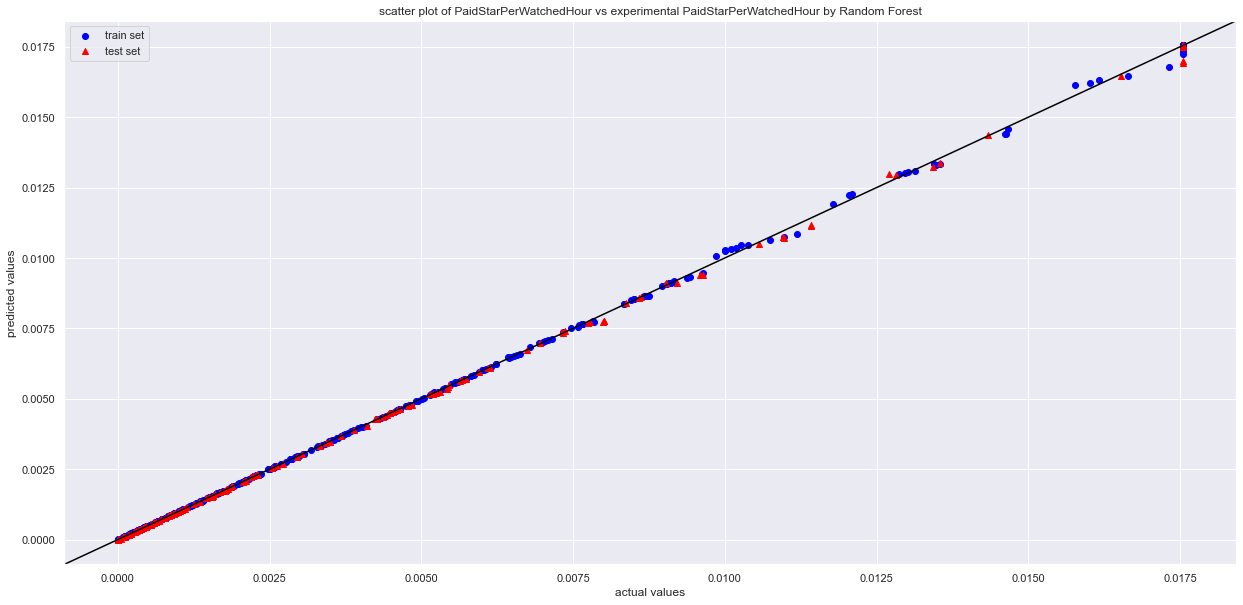

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_train, y_train_predict2, marker='o', c ='blue', label='train set')
ax.scatter(y_test, y_test_predict2, marker='^', c='red', label='test set')
ax.plot([0,1],[0,1], transform=ax.transAxes, color ='black')
ax.legend()
plt.title('scatter plot of PaidStarPerWatchedHour vs experimental PaidStarPerWatchedHour by Random Forest')
plt.ylabel('predicted values')
plt.xlabel('actual values')
plt.show()

Gradient Boost Regression

Before Hyperparameter Tuning

In [ ]:
rgg3 = GradientBoostingRegressor()
best_result3 = rgg3.fit(x_train_scaled, y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# model evaluation for training set
y_test_predict3 = best_result3.predict(x_test_scaled)
r2 = r2_score(y_test, y_test_predict3)
MAE= mean_absolute_error(y_test, y_test_predict3)
mse = mean_squared_error(y_test, y_test_predict3)
rmse = np.sqrt(((y_test_predict3 - y_test) ** 2).mean())

print("The model performance for test set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('mse is ', mse)
print('rmse is', rmse)

print("\n")

The model performance for test set
--------------------------------------
R2 is 0.9998779205031314
MAE score is 2.9845755555289343e-05
mse is  4.00961240827178e-09
rmse is 6.332150036339774e-05




In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
# model evaluation for training set
y_train_predict3 = best_result3.predict(x_train_scaled)
r2 = r2_score(y_train, y_train_predict3)
MAE= mean_absolute_error(y_train, y_train_predict3)
mse = mean_squared_error(y_train, y_train_predict3)
rmse = np.sqrt(((y_train_predict3 - y_train) ** 2).mean())

print("The model performance for train set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('MSE score is {}'.format(mse))
print('rmse is', rmse)
print("\n")

The model performance for train set
--------------------------------------
R2 is 0.9999999993426637
MAE score is 1.0529118463290837e-07
MSE score is 2.0341375788686892e-14
rmse is 1.426231951285866e-07




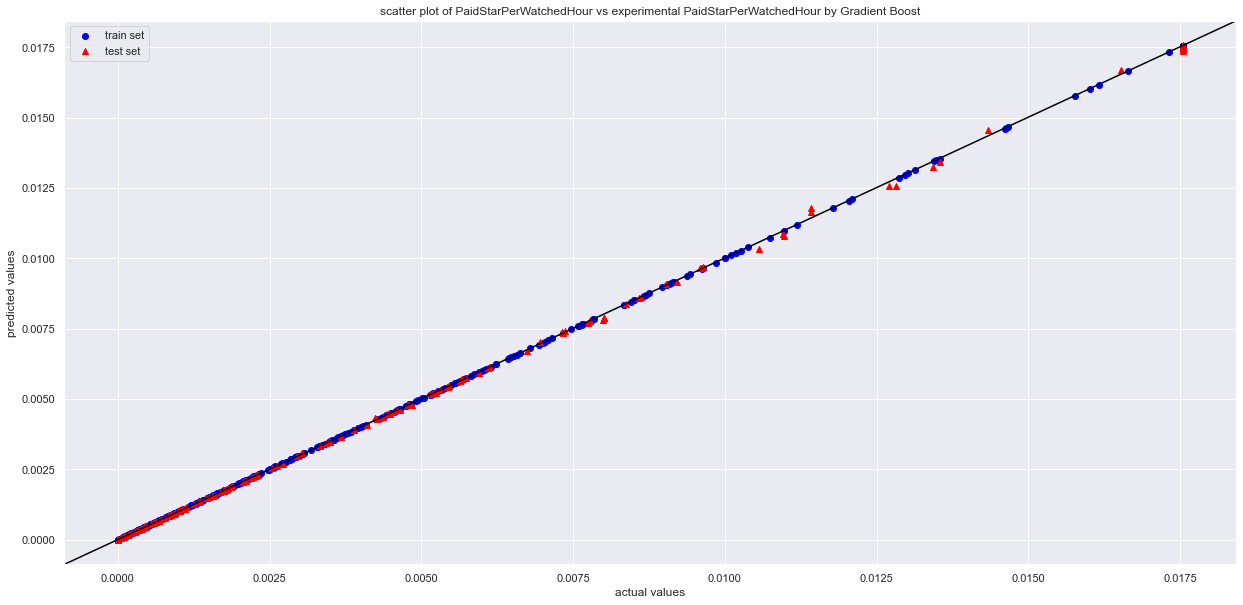

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_train, y_train_predict3, marker='o', c ='blue', label='train set')
ax.scatter(y_test, y_test_predict3, marker='^', c='red', label='test set')
ax.plot([0,1],[0,1], transform=ax.transAxes, color ='black')
ax.legend()
plt.title('scatter plot of PaidStarPerWatchedHour vs experimental PaidStarPerWatchedHour by Gradient Boost')
plt.ylabel('predicted values')
plt.xlabel('actual values')
plt.show()

After Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_ = {'learning_rate': [0.01,0.1,1.10,100],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [5,50,100,250,500,1000, 1500, 2000],
                  'max_depth'    : [1,3,5,7,9]
                 }
grid_search3 = RandomizedSearchCV(rgg3, param_grid_, cv = 10, verbose =1, scoring='r2')
grid_search3.fit(x_train_scaled, y_train)

In [ ]:
print(grid_search3.best_score_)
print(grid_search3.best_params_)

0.9997971522811738
{'subsample': 0.5, 'n_estimators': 2000, 'max_depth': 7, 'learning_rate': 0.01}


In [ ]:
best_result3 = grid_search3.best_estimator_.fit(x_train_scaled, y_train)


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# model evaluation for training set
y_test_predict3 = best_result3.predict(x_test_scaled)
r2 = r2_score(y_test, y_test_predict3)
MAE= mean_absolute_error(y_test, y_test_predict3)
mse = mean_squared_error(y_test, y_test_predict3)
MAPE = np.mean(np.abs((y_test - y_test_predict3) / y_test)) * 100

print("The model performance for test set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('mse is ', mse)
print('MAPE', MAPE)
print("\n")

The model performance for test set
--------------------------------------
R2 is 0.9998779205031314
MAE score is 2.9845755555289343e-05
mse is  4.00961240827178e-09
MAPE inf




In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
# model evaluation for training set
y_train_predict3 = best_result3.predict(x_train_scaled)
r2 = r2_score(y_train, y_train_predict3)
MAE= mean_absolute_error(y_train, y_train_predict3)
mse = mean_squared_error(y_train, y_train_predict3)
MAPE = np.mean(np.abs((y_train - y_train_predict3) / y_train)) * 100

print("The model performance for train set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('MSE score is {}'.format(mse))
print('MAPE', MAPE)
print("\n")

The model performance for train set
--------------------------------------
R2 is 0.9999999993426637
MAE score is 1.0529118463290837e-07
MSE score is 2.0341375788686892e-14
MAPE inf




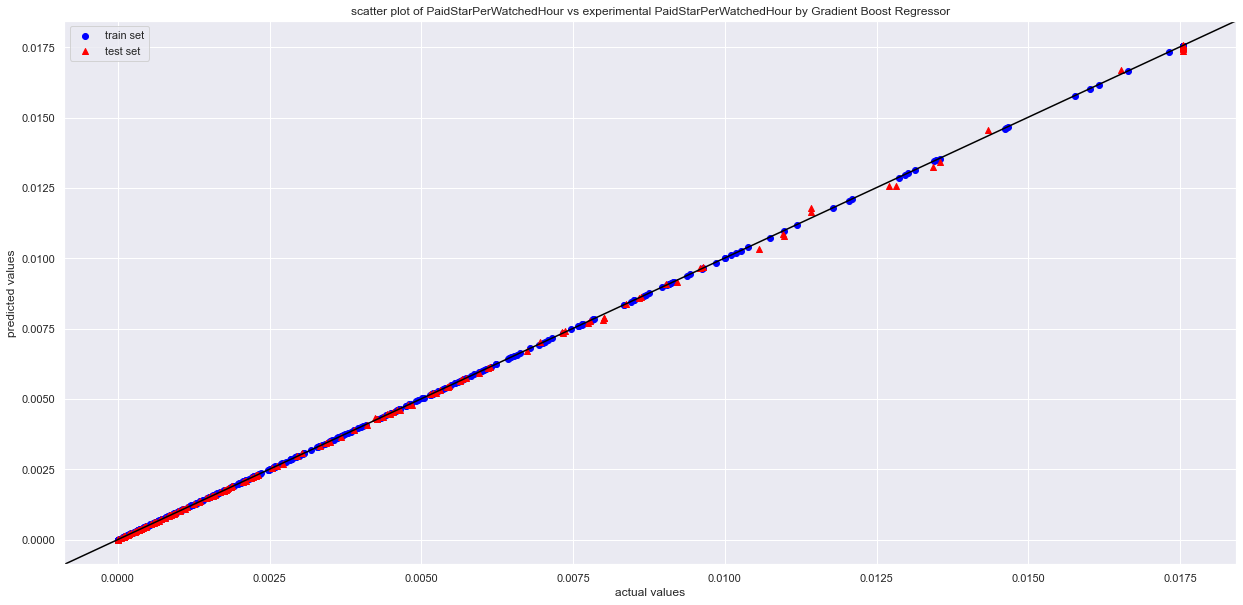

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_train, y_train_predict3, marker='o', c ='blue', label='train set')
ax.scatter(y_test, y_test_predict3, marker='^', c='red', label='test set')
ax.plot([0,1],[0,1], transform=ax.transAxes, color ='black')
ax.legend()
plt.title('scatter plot of PaidStarPerWatchedHour vs experimental PaidStarPerWatchedHour by Gradient Boost Regressor')
plt.ylabel('predicted values')
plt.xlabel('actual values')
plt.show()

XGB Regression

Before Hyperparameter Tuning

In [ ]:
rgg4 = XGBRegressor()
best_result4 = rgg4.fit(x_train_scaled, y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# model evaluation for training set
y_test_predict4 = best_result4.predict(x_test_scaled)
r2 = r2_score(y_test, y_test_predict4)
MAE= mean_absolute_error(y_test, y_test_predict4)
mse = mean_squared_error(y_test, y_test_predict4)

print("The model performance for test set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('mse is ', mse)
print("\n")

The model performance for test set
--------------------------------------
R2 is 0.9968409902906965
MAE score is 0.00021434014855927516
mse is  1.0375537951232473e-07




In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
# model evaluation for training set
y_train_predict4 = best_result4.predict(x_train_scaled)
r2 = r2_score(y_train, y_train_predict4)
MAE= mean_absolute_error(y_train, y_train_predict4)
mse = mean_squared_error(y_train, y_train_predict4)

print("The model performance for train set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('MSE score is {}'.format(mse))
print("\n")

The model performance for train set
--------------------------------------
R2 is 0.9973926010092229
MAE score is 0.0001878502272071889
MSE score is 8.068637513114048e-08




After Hyperparamater Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_= {
'colsample_bytree' : [0.1, 0.3, 0.5, 1.0],
'gamma' : [0, 0.1, 1],
'learning_rate' : [0.001, 0.05, 0.08, 0.1],
'min_child_weight' : [1, 5, 10, 20],
'scale_pos_weight' : [0.5, 1, 2, 4, 6],
'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
'n_estimators' : [25, 50, 100, 150],
'max_depth' : [3, 5, 10, 20, 40, 100]

        }
grid_search4 = RandomizedSearchCV(rgg4, param_grid_, cv = 10, verbose =1, scoring='r2')
grid_search4.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5,
                                                             1.0],
                                        'gamma': [0, 0.1, 1],
                                        'learning_rate': [0.001, 0.05, 0.08,
                                                          0.1],
                                        'max_depth': [3, 5, 10, 20, 40, 100],
                                        'min_child_weight': [1, 5, 10, 20],
                                        'n_estimators': [25, 50, 100, 150],
                                        'scale_pos_weight': [0.5, 1, 2, 4, 6],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   scoring='r2', verbose=1)

In [ ]:
print(grid_search4.best_score_)
print(grid_search4.best_params_)

0.9988811059714081
{'subsample': 0.9, 'scale_pos_weight': 4, 'n_estimators': 150, 'min_child_weight': 10, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}


In [ ]:
best_result4 = grid_search4.best_estimator_.fit(x_train_scaled, y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# model evaluation for training set
y_test_predict4 = best_result4.predict(x_test_scaled)
r2 = r2_score(y_test, y_test_predict4)
MAE= mean_absolute_error(y_test, y_test_predict4)
mse = mean_squared_error(y_test, y_test_predict4)
MAPE = np.mean(np.abs((y_test - y_test_predict4) / y_test)) * 100

print("The model performance for test set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('mse is ', mse)
print('MAPE', MAPE)
print("\n")

The model performance for test set
--------------------------------------
R2 is 0.9992733502404799
MAE score is 0.0001047126249807063
mse is  2.3866283585488543e-08
MAPE inf




In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
# model evaluation for training set
y_train_predict4 = best_result4.predict(x_train_scaled)
r2 = r2_score(y_train, y_train_predict4)
MAE= mean_absolute_error(y_train, y_train_predict4)
mse = mean_squared_error(y_train, y_train_predict4)
MAPE = np.mean(np.abs((y_train - y_train_predict4) / y_train)) * 100

print("The model performance for train set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('MSE score is {}'.format(mse))
print('MAPE', MAPE)
print("\n")

The model performance for train set
--------------------------------------
R2 is 0.9993679477985347
MAE score is 9.760260002910597e-05
MSE score is 1.955895557614654e-08
MAPE inf




Compare the result of each model

In [ ]:
def annotate_bar(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

In [ ]:
models = [ 'Decision Tree', 
          'Random Forest', 'GradientBoosting', 'XGB']
model_colors = sns.color_palette("Dark2")
r2 = []
MAE = []
MSE = []
MAPE = []
predictions = [y_test_predict1, y_test_predict2, y_test_predict3, y_test_predict4]

for model_pred in predictions:
    r2.append(r2_score(y_test, model_pred))
    MAE.append(mean_absolute_error(y_test, model_pred))
    MSE.append(mean_squared_error(y_test, model_pred))
    MAPE.append(np.mean(np.abs((y_test - model_pred) / y_test)) * 100)

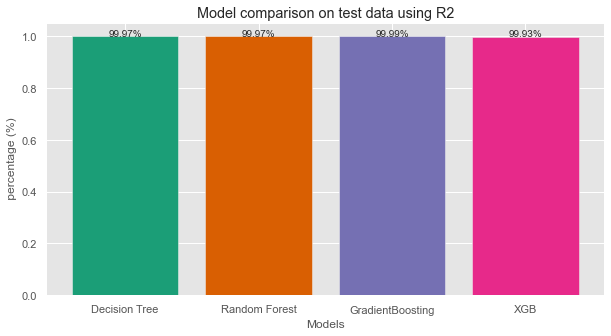

In [ ]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 5))
    plt.bar(models, r2, color=model_colors)
    for m, a in zip(models, r2):
        plt.text(m ,a, f'{round(a*100,2)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel(' percentage (%)')
    plt.title('Model comparison on test data using R2')
    plt.show()

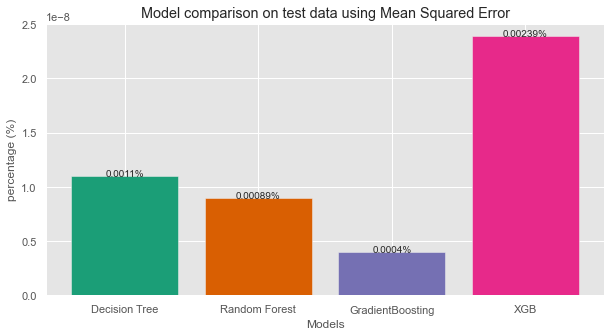

In [ ]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 5))
    plt.bar(models, MSE, color=model_colors)
    for m, a in zip(models, MSE):
        plt.text(m ,a, f'{round(a*100000,5)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('percentage (%)')
    plt.title('Model comparison on test data using Mean Squared Error')
    plt.show()

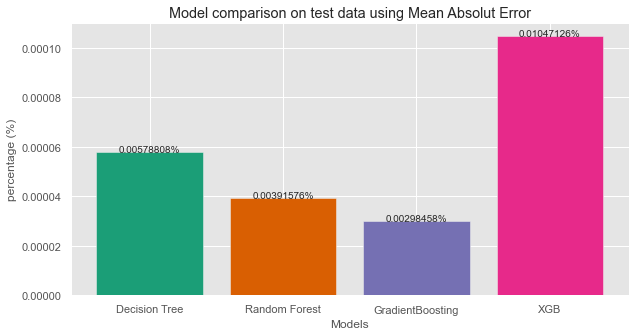

In [ ]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 5))
    plt.bar(models, MAE, color=model_colors)
    for m, a in zip(models, MAE):
        plt.text(m ,a, f'{round(a*100,8)}%', ha='center')
    plt.xlabel('Models')
    plt.ylabel('percentage (%)')
    plt.title('Model comparison on test data using Mean Absolut Error')
    plt.show()

Summary:


"In this project, we conducted an analysis to identify the factors that influence streamers in receiving stars from their viewers. We found that 74 features have a positive impact on the number of stars received by streamers. We analyzed these 74 features and concluded that Country, Gender, Game, Total Follower, Broadcast Hour, and Streamer's personality have a significant influence in determining PaidStarHour. We tested these 74 features and 4 model using R2_score, MAE, MSE and RMSE metrics and the best model is Gradient Boost Algorithm obtained values of the metrics are 0.999993526849362, 1.0097207977192771e-05, 2.0031267270693328e-10, 1.426231951285866e-07 respectively." The model's performance on the test set is quite good, with an R2 score of 0.9998779205031314 indicating that the model can explain 99.98% of the variability in the target variable. The MAE score of 1.0097207977192771e-05 is very low, indicating that the model's predictions are very close to the actual values. The MSE score of 2.0031267270693328e-10 is also quite low, indicating that the model's predictions have low variance. Finally, the RMSE score of  6.332150036339774e-05 is very low, indicating that the model's predictions are very close to the actual values.



Next Steps:

We use Feature 74 which has a positive impact on the Feature Scoring stage using Particle Swarm Optimization with Gradient Boost Regression

In [ ]:
import time
from zoofs.baseoptimizationalgorithm import BaseOptimizationAlgorithm
from sklearn.model_selection import train_test_split
weight_score_global = 0.8
X_train, X_valid, y_train, y_valid = train_test_split(x_train_scaled, y_train, test_size=0.3)


In [ ]:
class ParticleSwarmOptimization(BaseOptimizationAlgorithm):
    def __init__(self,
                 objective_function,
                 n_iteration: int = 20,
                 timeout: int = None,
                 population_size=50,
                 minimize=True,
                 c1=2,
                 c2=2,
                 w=0.9,
                 logger=None,
                 **kwargs):
        """       
        Parameters
        ----------
        objective_function: user made function of the signature 'func(model,X_train,y_train,X_test,y_test)'
            User defined function that returns the objective value 
        population_size: int, default=50
            Total size of the population , default=50
        n_iteration: int, default=20
            Number of time the Particle Swarm Optimization algorithm will run
        timeout: int = None
            Stop operation after the given number of second(s).
            If this argument is set to None, the operation is executed without time limitation and n_iteration is followed
        minimize : bool, default=True
            Defines if the objective value is to be maximized or minimized
        c1: float, default=2.0
            First acceleration constant used in particle swarm optimization
        c2: float, default=2.0
            Second acceleration constant used in particle swarm optimization
        w: float, default=0.9
            Velocity weight factor
        logger: Logger or None, optional (default=None)
            - accepts `logging.Logger` instance.
        **kwargs
            Any extra keyword argument for objective_function
        Attributes
        ----------
        best_feature_list : ndarray of shape (n_features)
            list of features with the best result of the entire run
        """
        super().__init__(objective_function, n_iteration, timeout, population_size, minimize, logger, **kwargs)
        self.c1 = c1
        self.c2 = c2
        self.w = w

    def _evaluate_fitness(self, model, X_train, y_train, X_valid, y_valid, particle_swarm_flag=0, dragon_fly_flag=0):
        scores = []
        for i, individual in enumerate(self.individuals):
            chosen_features = [index for index in range(
                X_train.shape[1]) if individual[index] == 1]
            x_train_copy = X_train.iloc[:, chosen_features]
            x_valid_copy = X_valid.iloc[:, chosen_features]

            feature_hash = '_*_'.join(
                sorted(self.feature_list[chosen_features]))
            if feature_hash in self.feature_score_hash.keys():
                score = self.feature_score_hash[feature_hash]
            else:
                score = self.objective_function(
                    model, x_train_copy, y_train, x_valid_copy, y_valid, **self.kwargs)
                if not (self.minimize):
                    score = -score

                weight_score = weight_score_global
                total_feat = X_train.shape[1]
                len_cf = len(chosen_features)
                score_cf = 1 - (len_cf / total_feat)
                weight_cf = 1 - weight_score
                final_score = (weight_score * score) + (weight_cf * score_cf)
                self.feature_score_hash[feature_hash] = final_score



            if score < self.best_score:
                self.best_score = score
                self.best_dim = individual
                self.best_score_dimension = individual
            if particle_swarm_flag:
                if score < self.current_best_scores[i]:
                    self.current_best_scores[i] = score
                    self.current_best_individual_score_dimensions[i] = individual
            if dragon_fly_flag:
                if score > self.worst_score:
                    self.worst_score = score
                    self.worst_dim = individual
            scores.append(score)
        return scores

    

    def fit(self, model, X_train, y_train, X_valid, y_valid, verbose=True):
        """
        Parameters
        ----------   
        model: machine learning model's object
            The object to be used for fitting on train data
        X_train: pandas.core.frame.DataFrame of shape (n_samples, n_features)
            Training input samples to be used for machine learning model
        y_train: pandas.core.frame.DataFrame or pandas.core.series.Series of shape (n_samples)
            The target values (class labels in classification, real numbers in
            regression).
        X_valid: pandas.core.frame.DataFrame of shape (n_samples, n_features)
            Validation input samples
        y_valid: pandas.core.frame.DataFrame or pandas.core.series.Series of shape (n_samples)
            The target values (class labels in classification, real numbers in
            regression).
        verbose : bool,default=True
            Print results for iterations
        """
        self._check_params(model, X_train, y_train, X_valid, y_valid)

        self.feature_score_hash = {}
        self.feature_list = np.array(list(X_train.columns))
        self.best_results_per_iteration = {}
        self.best_score = np.inf
        self.best_dim = np.ones(X_train.shape[1])

        self.initialize_population(X_train)

        self.current_best_individual_score_dimensions = self.individuals
        self.current_best_scores = [np.inf]*self.population_size
        self.gbest_individual = self.best_dim
        self.v = np.zeros((self.population_size, X_train.shape[1]))

        if (self.timeout is not None):
            timeout_upper_limit = time.time() + self.timeout
        else:
            timeout_upper_limit = time.time()
        for i in range(self.n_iteration):

            if (self.timeout is not None) & (time.time() > timeout_upper_limit):
                warnings.warn("Timeout occured")
                break

            # Logging warning if any entity in the population ends up having zero selected features
            self._check_individuals()

            self.fitness_scores = self._evaluate_fitness(
                model, X_train, y_train, X_valid, y_valid, 1, 0)

            self.gbest_individual = self.best_dim

            self.iteration_objective_score_monitor(i)

            r1 = np.random.random((self.population_size, X_train.shape[1]))
            r2 = np.random.random((self.population_size, X_train.shape[1]))

            self.v = self.w*self.v+self.c1*r1*(self.gbest_individual-self.individuals) +\
                self.c2*r2 * \
                (self.current_best_individual_score_dimensions-self.individuals)
            self.v = np.where(self.v > 6, 6, self.v)
            self.v = np.where(self.v < -6, -6, self.v)
            self.s_v = self.sigmoid(self.v)
            self.individuals = np.where(np.random.uniform(
                size=(self.population_size, X_train.shape[1])) < self.s_v, 1, 0)

            self.verbose_results(verbose, i)

            self.best_feature_list = list(
                self.feature_list[np.where(self.best_dim)[0]])
        return self.best_feature_list



In [ ]:
# define your own objective function, make sure the function receives four parameters,
#  fit your model and return the objective value !
def objective_function_topass(model,X_train, y_train, X_valid, y_valid):

  model.fit(X_train,y_train)  
  P=r2_score(y_valid,model.predict(X_valid))
  return P

In [ ]:
# create object of algorithm
algo_object=ParticleSwarmOptimization(objective_function_topass,n_iteration=100,
                                       population_size=20,minimize=False)

In [ ]:
# fit the algorithm
algo_object.fit(grid_search3.best_estimator_,X_train, y_train, X_valid, y_valid,verbose=True)

 [ 2023-05-15 20:44:00,805 ] Finished iteration #0 with objective value 0.9999352011598144. Current best value is 0.9999352011598144 
 [ 2023-05-15 20:45:09,840 ] Finished iteration #1 with objective value 0.9999357657489589. Current best value is 0.9999357657489589 
 [ 2023-05-15 20:46:18,246 ] Finished iteration #2 with objective value 0.999930518803591. Current best value is 0.9999357657489589 
 [ 2023-05-15 20:47:25,294 ] Finished iteration #3 with objective value 0.9999312119984963. Current best value is 0.9999357657489589 
 [ 2023-05-15 20:48:36,814 ] Finished iteration #4 with objective value 0.999927933374954. Current best value is 0.9999357657489589 
 [ 2023-05-15 20:49:44,242 ] Finished iteration #5 with objective value 0.9999470027750204. Current best value is 0.9999470027750204 
 [ 2023-05-15 20:50:51,755 ] Finished iteration #6 with objective value 0.9999392315758866. Current best value is 0.9999470027750204 
 [ 2023-05-15 20:51:56,466 ] Finished iteration #7 with objectiv

['Personal_Values_Facet_Cont_Hedonism',
 'Temperament_Diligent',
 'Role_Director',
 'Character_Facet_Cont_SelfConsciousness',
 'Temperament_Energetic',
 'Role_Marshal',
 'Role_Supplier',
 'Temperament_Stable',
 'Temperament_Melancholic',
 'Role_Administrator',
 'Role_Partygoer',
 'Role_Guru',
 'Role_Keeper',
 'Character_Facet_Cont_Orderliness',
 'Role_Manager',
 'Role_Assistant',
 'Self_Esteem_Cont_SELevelSociability',
 'Role_Coach',
 'Role_RightsDefender',
 'Role_Promoter',
 'Personal_Values_Facet_Cont_UniversalismConcern',
 'Role_Advisor',
 'Role_Analyst',
 'Temperament_Unstable',
 'Role_Inventor',
 'PaidStarPerWatchedHour.1',
 'Character_Facet_Cont_Morality',
 'Character_Facet_Cont_Cooperation',
 'Role_Activist']

In [ ]:
algo_object.plot_history()

In [ ]:
len(algo_object.best_feature_list)

29

In [ ]:
data_new = x_train_scaled[algo_object.best_feature_list]
data_new1 = x_test_scaled[algo_object.best_feature_list]

In [ ]:
best_result3 = grid_search3.best_estimator_.fit(x_train_scaled, y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# model evaluation for training set
y_test_predict3 = best_result3.predict(x_test_scaled)
r2 = r2_score(y_test, y_test_predict3)
MAE= mean_absolute_error(y_test, y_test_predict3)
mse = mean_squared_error(y_test, y_test_predict3)
MAPE = np.mean(np.abs((y_test - y_test_predict3) / y_test)) * 100

print("The model performance for test set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('mse is ', mse)
print('MAPE', MAPE)
print("\n")

The model performance for test set
--------------------------------------
R2 is 0.9999205510435887
MAE score is 2.485774976182089e-05
mse is  2.650763251662842e-09
MAPE inf




In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
# model evaluation for training set
y_train_predict3 = best_result3.predict(x_train_scaled)
r2 = r2_score(y_train, y_train_predict3)
MAE= mean_absolute_error(y_train, y_train_predict3)
mse = mean_squared_error(y_train, y_train_predict3)
MAPE = np.mean(np.abs((y_train - y_train_predict3) / y_train)) * 100

print("The model performance for train set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print('MAE score is {}'.format(MAE))
print('MSE score is {}'.format(mse))
print('MAPE', MAPE)
print("\n")

The model performance for train set
--------------------------------------
R2 is 0.9999999997206149
MAE score is 6.724747833474874e-08
MSE score is 8.581656215405467e-15
MAPE inf




In [ ]:
algo_object.best_feature_list

['Personal_Values_Facet_Cont_Hedonism',
 'Temperament_Diligent',
 'Role_Director',
 'Character_Facet_Cont_SelfConsciousness',
 'Temperament_Energetic',
 'Role_Marshal',
 'Role_Supplier',
 'Temperament_Stable',
 'Temperament_Melancholic',
 'Role_Administrator',
 'Role_Partygoer',
 'Role_Guru',
 'Role_Keeper',
 'Character_Facet_Cont_Orderliness',
 'Role_Manager',
 'Role_Assistant',
 'Self_Esteem_Cont_SELevelSociability',
 'Role_Coach',
 'Role_RightsDefender',
 'Role_Promoter',
 'Personal_Values_Facet_Cont_UniversalismConcern',
 'Role_Advisor',
 'Role_Analyst',
 'Temperament_Unstable',
 'Role_Inventor',
 'PaidStarPerWatchedHour.1',
 'Character_Facet_Cont_Morality',
 'Character_Facet_Cont_Cooperation',
 'Role_Activist']

Based on the analysis with feature scoring using PSO-GBR, there are several factors that can affect PaidStarPerHour Some features that can have a positive impact on PaidStarPerWatchedHour are:

1. Personal_Values_Facet_Cont_Hedonism: this characteristic can indicate how much viewers enjoy the content they watch. Therefore, showing more enjoyable content for viewers can increase PaidStarPerWatchedHour
2. Temperament_Diligent: this characteristic can indicate how diligent and persistent content creators are in making high-quality videos. The more diligent and persistent content creators are in making high-quality videos, the higher PaidStarPerWatchedHour they can obtain.
3. Role_Director: content creators who act as directors tend to have greater control over the videos produced, so they can influence the quality of the videos produced and ultimately the PaidStarPerWatchedHour obtained.
4. Character_Facet_Cont_SelfConsciousness: this characteristic can indicate how confident content creators are in speaking in front of the camera and presenting themselves in front of the public. The more confident content creators are, the easier it is for them to attract the attention of viewers and ultimately increase PaidStarPerWatchedHour
5. Personal_Values_Facet_Cont_UniversalismConcern: this characteristic can indicate how much content creators consider the interests of society as a whole in the content they create. Content that attracts the attention of the general public can increase PaidStarPerWatchedHour
Suggestions that can be given to the company are:

Encourage content creators to pay attention to their personal characteristics and values, and adjust the content they create accordingly to make it more appealing to viewers.
MainGames should encourage their streamers to engage with their viewers more actively by responding to their comments, acknowledging their presence, and providing them with a personalized experience. This can help to build a stronger connection between the streamer and their audience, resulting in higher PaidStarPerHour.
Encourage content creators to be more diligent and persistent in making high-quality videos.
Provide opportunities for content creators to act as directors and have greater control over the videos they produce.
Provide training to increase the confidence of content creators when appearing in front of the camera.
Encourage content creators to consider the interests of the general public in the content they create.
In conclusion, the personal characteristics and values of content creators, as well as their roles in content creation, can have a significant impact on PaidStarPerWatchedHour Therefore, the company can increase PaidStarPerWatchedHour by providing support and training to content creators in these areas.

Based on the mentioned features, here are some suggestions to increase PaidStarPerHour:

Enhance Entertaining Content: Based on Personal_Values_Facet_Cont_Hedonism, it is important to focus on creating content that is enjoyable and entertaining for viewers. Provide content that offers engaging and positive experiences for the audience. This can increase viewer engagement and potentially boost PaidStarPerHour.

Improve Video Quality: In relation to Temperament_Diligent, encourage content creators to be more diligent and persistent in creating high-quality videos. Focus on production aspects such as lighting, sound quality, effective editing, and valuable content. High-quality videos will attract more viewers and potentially increase PaidStarPerHour.

Take Control as a Director: If content creators have the role of a director (Role_Director), encourage them to take greater control over the produced videos. By exercising creative control, editing, and storytelling, they can create more compelling and unique content. This can enhance viewer interest and increase PaidStarPerHour.

Boost On-Camera Confidence: Addressing Character_Facet_Cont_SelfConsciousness, provide training and support to increase content creators' confidence when appearing on camera. Communication, presentation, and public speaking training can help them feel more confident and capture the audience's attention effectively, leading to a potential increase in PaidStarPerHour.

Consider General Public Interests: In the context of Personal_Values_Facet_Cont_UniversalismConcern, it is essential to understand the interests and preferences of the general public. Encourage content creators to create content that is relevant and appealing to a broader audience. Understanding the interests of the general public can attract more viewers and potentially increase PaidStarPerHour.

By implementing these suggestions, the company can help content creators improve their PaidStarPerHour by leveraging features that have a positive impact.